In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('credit_card.csv')
df.head()



,Client_Num,Card_Category,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Week_Start_Date,Week_Num,Qtr,current_year,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Use Chip,Exp Type,Interest_Earned,Delinquent_Acc
0,708082083,Blue,200,0,87,01-01-2023,Week-1,Q1,2023,3544.0,1661,15149,111,0.469,Chip,Travel,4393.21,0
1,708083283,Blue,445,1,108,01-01-2023,Week-1,Q1,2023,3421.0,2517,992,21,0.736,Swipe,Entertainment,69.44,0
2,708084558,Blue,140,0,106,01-01-2023,Week-1,Q1,2023,8258.0,1771,1447,23,0.214,Chip,Bills,202.58,0
3,708085458,Blue,250,1,150,01-01-2023,Week-1,Q1,2023,1438.3,0,3940,82,0.000,Online,Grocery,236.40,0
4,708086958,Blue,320,1,106,01-01-2023,Week-1,Q1,2023,3128.0,749,4369,59,0.239,Swipe,Fuel,1004.87,1


In [5]:
df.describe()

,Client_Num,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,current_year,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Interest_Earned,Delinquent_Acc
count,1.010800e+04,10108.000000,10108.000000,10108.000000,10108.0,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000
mean,7.390104e+08,291.849525,0.574693,96.254056,2023.0,8635.642808,1162.792145,4404.631282,64.864563,0.274851,775.957878,0.060744
std,3.673623e+07,118.339384,0.494414,25.768677,0.0,9093.136113,815.160709,3397.910673,23.475110,0.275720,723.952320,0.238872
min,7.080821e+08,95.000000,0.000000,40.000000,2023.0,1438.300000,0.000000,510.000000,10.000000,0.000000,42.140000,0.000000
25%,7.130267e+08,195.000000,0.000000,79.000000,2023.0,2552.750000,355.500000,2155.750000,45.000000,0.022000,326.150000,0.000000
50%,7.179037e+08,295.000000,1.000000,95.000000,2023.0,4549.000000,1276.500000,3899.500000,67.000000,0.175000,559.985000,0.000000
75%,7.727989e+08,395.000000,1.000000,112.000000,2023.0,11070.250000,1784.000000,4741.000000,81.000000,0.503000,962.685000,0.000000
max,8.278908e+08,500.000000,1.000000,172.000000,2023.0,34516.000000,2517.000000,18484.000000,139.000000,0.999000,4785.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10108 entries, 0 to 10107
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Client_Num             10108 non-null  int64  
 1   Card_Category          10108 non-null  object 
 2   Annual_Fees            10108 non-null  int64  
 3   Activation_30_Days     10108 non-null  int64  
 4   Customer_Acq_Cost      10108 non-null  int64  
 5   Week_Start_Date        10108 non-null  object 
 6   Week_Num               10108 non-null  object 
 7   Qtr                    10108 non-null  object 
 8   current_year           10108 non-null  int64  
 9   Credit_Limit           10108 non-null  float64
 10  Total_Revolving_Bal    10108 non-null  int64  
 11  Total_Trans_Amt        10108 non-null  int64  
 12  Total_Trans_Vol        10108 non-null  int64  
 13  Avg_Utilization_Ratio  10108 non-null  float64
 14  Use Chip               10108 non-null  object 
 15  Ex

In [7]:
df.count()

Client_Num               10108
Card_Category            10108
Annual_Fees              10108
Activation_30_Days       10108
Customer_Acq_Cost        10108
Week_Start_Date          10108
Week_Num                 10108
Qtr                      10108
current_year             10108
Credit_Limit             10108
Total_Revolving_Bal      10108
Total_Trans_Amt          10108
Total_Trans_Vol          10108
Avg_Utilization_Ratio    10108
Use Chip                 10108
Exp Type                 10108
Interest_Earned          10108
Delinquent_Acc           10108
dtype: int64

In [12]:
numerical_features = [
    'Credit_Limit', 
    'Total_Trans_Amt', 
    'Avg_Utilization_Ratio', 
    'Interest_Earned', 
    'Annual_Fees'
]
categorical_features = [
    'Card_Category', 
    'Use Chip', 
    'Exp Type', 
    'Delinquent_Acc'
]


print("B. Descriptive Statistics (.describe())")
print(df[numerical_features].describe().T)

B. Descriptive Statistics (.describe())
                         count         mean          std      min       25%  \
Credit_Limit           10108.0  8635.642808  9093.136113  1438.30  2552.750   
Total_Trans_Amt        10108.0  4404.631282  3397.910673   510.00  2155.750   
Avg_Utilization_Ratio  10108.0     0.274851     0.275720     0.00     0.022   
Interest_Earned        10108.0   775.957878   723.952320    42.14   326.150   
Annual_Fees            10108.0   291.849525   118.339384    95.00   195.000   

                            50%        75%        max  
Credit_Limit           4549.000  11070.250  34516.000  
Total_Trans_Amt        3899.500   4741.000  18484.000  
Avg_Utilization_Ratio     0.175      0.503      0.999  
Interest_Earned         559.985    962.685   4785.000  
Annual_Fees             295.000    395.000    500.000  


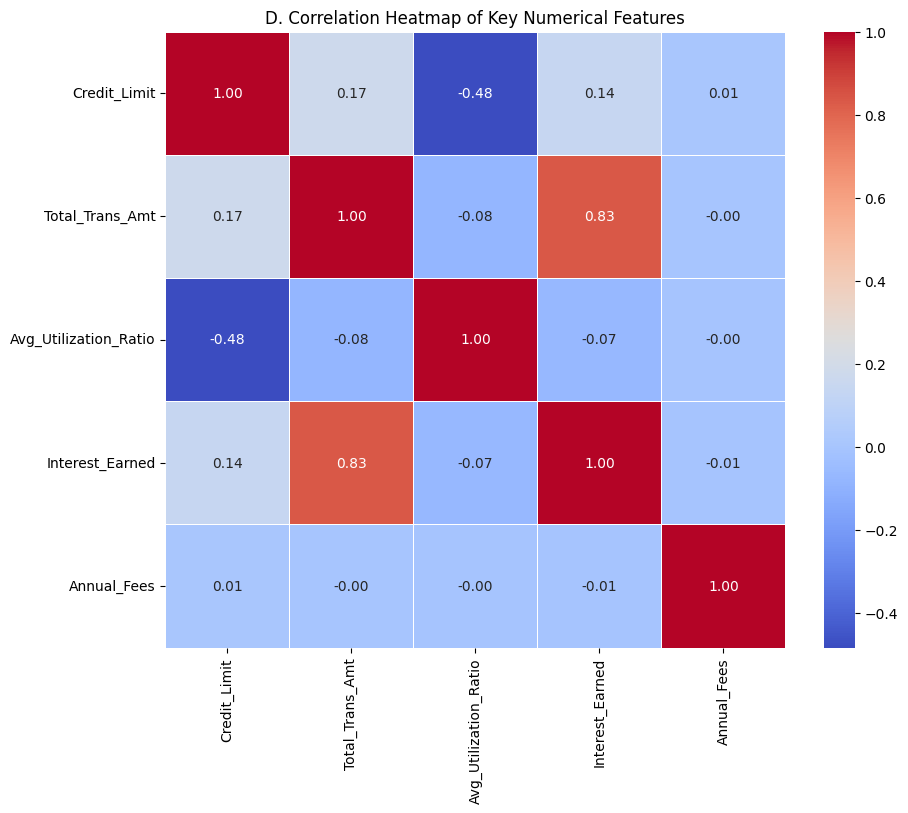

In [13]:
corr_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('D. Correlation Heatmap of Key Numerical Features')
plt.show()

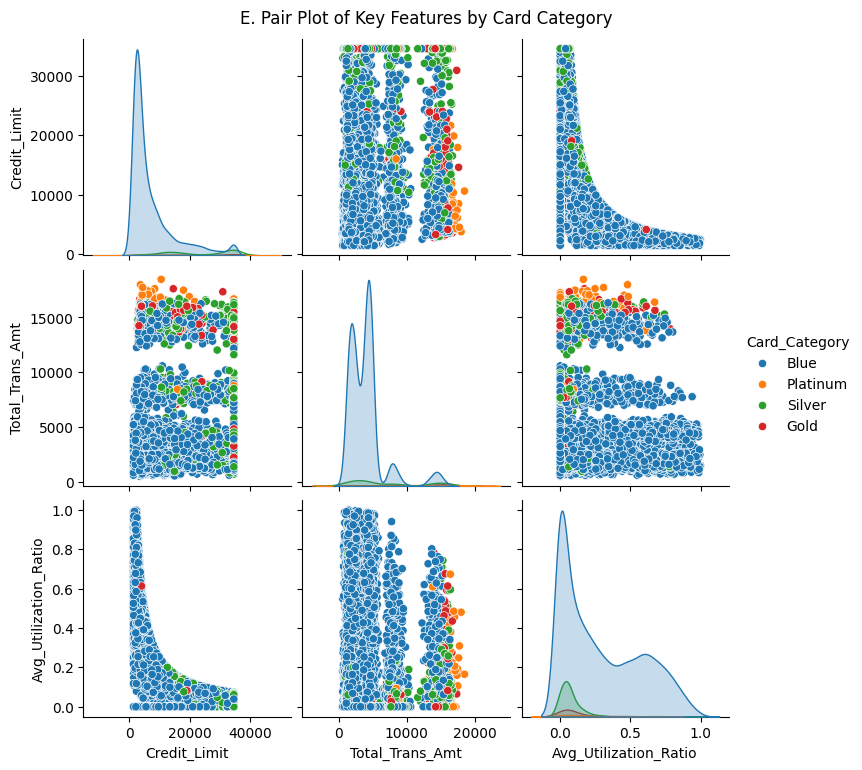

In [14]:
sns.pairplot(df, vars=['Credit_Limit', 'Total_Trans_Amt', 'Avg_Utilization_Ratio'], hue='Card_Category', diag_kind='kde')
plt.suptitle('E. Pair Plot of Key Features by Card Category', y=1.02)
plt.show()

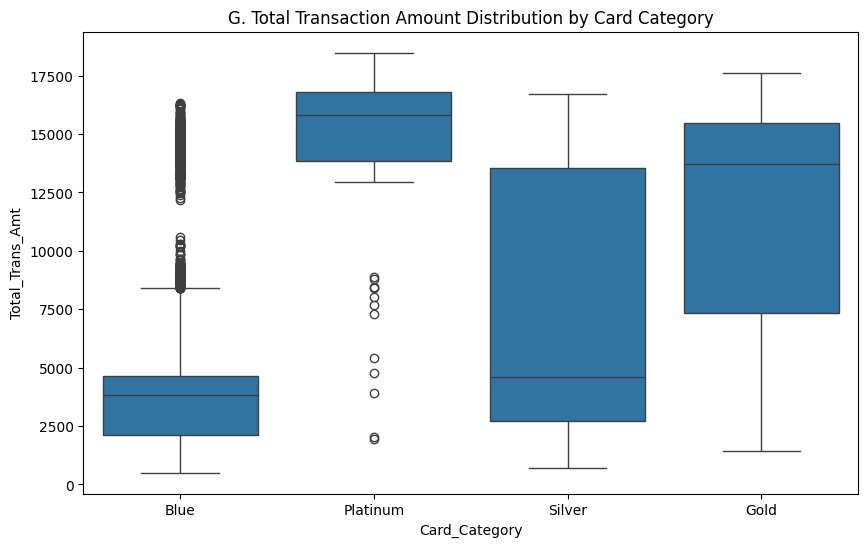

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Card_Category', y='Total_Trans_Amt', data=df)
plt.title('G. Total Transaction Amount Distribution by Card Category')
plt.show()

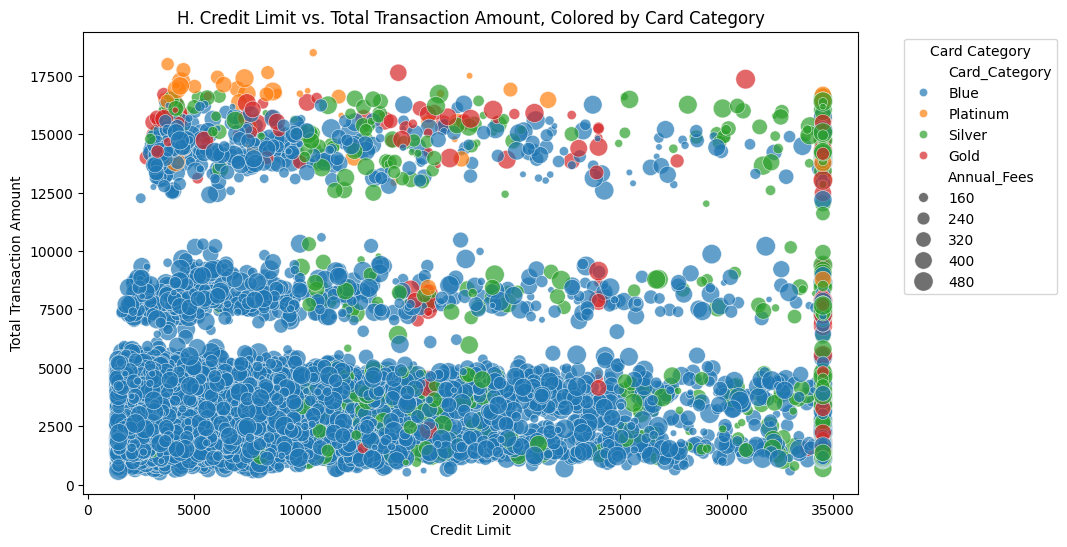

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Credit_Limit', y='Total_Trans_Amt', data=df, hue='Card_Category', size='Annual_Fees', sizes=(20, 200), alpha=0.7)
plt.title('H. Credit Limit vs. Total Transaction Amount, Colored by Card Category')
plt.xlabel('Credit Limit')
plt.ylabel('Total Transaction Amount')
plt.legend(title='Card Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
